# Point Like

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 13858
/bin/rm -f {acis,pcad}*.fits
download_chandra_obsid 13858 --exclude vvref,osol,eph1
chandra_repro 13858 out="./" clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       22 Mb  ####################          < 1 s  91068.9 kb/s
  evt2     fits        5 Mb  ####################          < 1 s  67757.4 kb/s
  asol     fits        3 Mb  ####################          < 1 s  59138.5 kb/s
  mtl      fits      637 Kb  ####################          < 1 s  25795.3 kb/s
  bias     fits      495 Kb  ####################          < 1 s  21475.9 kb/s
  bias     fits      451 Kb  ####################          < 1 s  14395.8 kb/s
  bias     fits      437 Kb  ####################          < 1 s  17485.0 kb/s
  bias     fits      423 Kb  ####################          < 1 s  14450.6 kb/s
  stat     fits      361 Kb  ####################          < 1 s  15212.4 kb/s
  aqual    fits      250 Kb  ####################          < 1 s  18257.4 kb/s
  cntr_img jpg       139 Kb  ####################    

## Regions

In [3]:
cat << EOM > src.reg
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(9:14:49.090,+8:53:21.231,4.083")
EOM

In [4]:
cat << EOM >  bkg.reg
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
annulus(9:14:49.074,+8:53:20.987,9.064",46.425") # background
EOM

[1] 46040
[1]+  Done                    ds9 acisf13858_repro_evt2.fits -region src.reg -region bkg.reg -scale log -saveimage png ds9_01.png


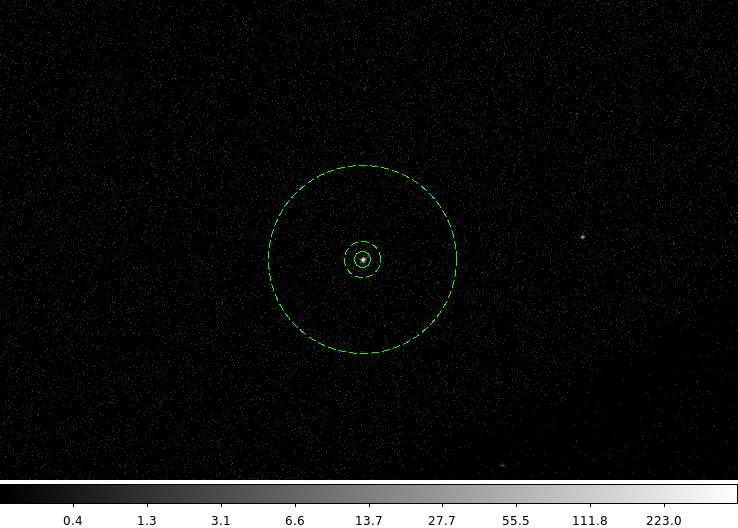

In [5]:
ds9 acisf13858_repro_evt2.fits -region src.reg -region bkg.reg \
  -scale log  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

## Using specextract

In [6]:
pset specextract infile="acisf13858_repro_evt2.fits[sky=region(src.reg)]"
pset specextract bkgfile="acisf13858_repro_evt2.fits[sky=region(bkg.reg)]"
pset specextract outroot=SDSSJ091449.05+085321
pset specextract correctpsf=yes
pset specextract weight=no
specextract mode=h clob+


Running specextract
Version: 26 May 2021

Checking for blank sky background files...
Using event file acisf13858_repro_evt2.fits[sky=region(src.reg)]

Aspect solution file pcadf13858_000N001_asol1.fits found.

Bad-pixel file acisf13858_repro_bpix1.fits found.

Mask file acisf13858_000N002_msk1.fits found.

Setting bad pixel file 

Converting source region to physical coordinates 

Extracting src spectra 

Creating src ARF 

Calculating aperture correction for src ARF 

Using mkacisrmf...

Creating src RMF 

Grouping src spectrum 

Updating header of SDSSJ091449.05+085321.pi with RESPFILE and ANCRFILE keywords.

Updating header of SDSSJ091449.05+085321_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file 

Extracting bkg spectra 

Creating bkg ARF 

Using mkacisrmf...

Creating bkg RMF 

Updating header of SDSSJ091449.05+085321_bkg.pi with RESPFILE and ANCRFILE keywords.

Updating header of SDSSJ091449.05+085321.pi with BACKFILE keyword.

Updating header of SDSSJ091449.05

## Examine Files

In [7]:
/bin/ls -1 SDSSJ091449.05+085321*

SDSSJ091449.05+085321.arf
SDSSJ091449.05+085321.corr.arf
SDSSJ091449.05+085321.pi
SDSSJ091449.05+085321.rmf
SDSSJ091449.05+085321_bkg.arf
SDSSJ091449.05+085321_bkg.pi
SDSSJ091449.05+085321_bkg.rmf
SDSSJ091449.05+085321_grp.pi


---

## Step By Step


### 1. Extract Source Spectra

In [8]:
pset dmextract infile="acisf13858_repro_evt2.fits[sky=region(src.reg)][bin pi]" 
pset dmextract outfile=step_by_step.pi 
pset dmextract op=pha1
dmextract mode=h clob+


In [9]:
punlearn ardlib
acis_set_ardlib acisf13858_repro_bpix1.fits absolute=no

Updated ardlib parameter file: /proj/sds/Staff/kjg/Threads/pointlike/param/ardlib.par
  AXAF_ACIS0_BADPIX_FILE -> CALDB
  AXAF_ACIS1_BADPIX_FILE -> CALDB
  AXAF_ACIS2_BADPIX_FILE -> CALDB
  AXAF_ACIS3_BADPIX_FILE -> CALDB
  AXAF_ACIS4_BADPIX_FILE -> CALDB
  AXAF_ACIS5_BADPIX_FILE -> acisf13858_repro_bpix1.fits[BADPIX5]
  AXAF_ACIS6_BADPIX_FILE -> acisf13858_repro_bpix1.fits[BADPIX6]
  AXAF_ACIS7_BADPIX_FILE -> acisf13858_repro_bpix1.fits[BADPIX7]
  AXAF_ACIS8_BADPIX_FILE -> acisf13858_repro_bpix1.fits[BADPIX8]
  AXAF_ACIS9_BADPIX_FILE -> CALDB


In [10]:
dmstat "acisf13858_repro_evt2.fits[sky=region(src.reg)][bin sky=1]" centroid=yes
xcen=`stk_read_num ")dmstat.out_cntrd_phys" 1 echo+`
ycen=`stk_read_num ")dmstat.out_cntrd_phys" 2 echo+`
echo $xcen $ycen

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 4087.5156896 4069.7470187 )
    max:	548 	      @:	( 4090.5156896 4077.7470187 )
cntrd[log] :	( 9.2656784493 8.8540478905 )
cntrd[phys]:	( 4090.7813681 4077.6010666 )
sigma_cntrd:	( 4.6531142979 3.7221501469 )
   good:	218 
   null:	71 
4090.7813681 4077.6010666


In [11]:
punlearn dmcoords
dmcoords acisf13858_repro_evt2.fits op=sky x=${xcen} y=${ycen} verb=0
cid=`pget dmcoords chip_id`
cx=`pget dmcoords chipx`
cy=`pget dmcoords chipy`
echo $cid $cx $cy


7 206.9115965134037 517.9529717523046


### 2. Calculate the RMFs

#### mkacisrmf

In [12]:
pset mkacisrmf infile=CALDB
pset mkacisrmf wmap=none
pset mkacisrmf obsfile=acisf13858_repro_evt2.fits
pset mkacisrmf ccd_id=${cid} chipx=${cx} chipy=${cy}
pset mkacisrmf chantype=PI channel=1:1024:1 energy=0.3:11.0:0.01
pset mkacisrmf outfile=step_by_step.rmf 
mkacisrmf mode=h clob+



Single region, #9425 , processed.


#### mkrmf

In [13]:
pset acis_fef_lookup infile=acisf13858_repro_evt2.fits 
pset acis_fef_lookup chipid=${cid} chipx=${cx} chipy=${cy}
acis_fef_lookup mode=h 


/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/acis/fef_pha/acisD2000-01-29fef_pha_ctiN0004.fits[FUNCTION][ccd_id=7,chipx=193:224,chipy=513:544]


In [14]:
pset mkrmf infile=")acis_fef_lookup.outfile" 
pset mkrmf axis1=energy=0.3:11.0:0.01
pset mkrmf axis2=pi=1:1024:1
pset mkrmf outfile=step_by_step_fef.rmf
mkrmf mode=h clob+

### 3. Calculate the ARFs

#### asphist

In [15]:
pset asphist infile= pcadf13858_000N001_asol1.fits
pset asphist evtfile="acisf13858_repro_evt2.fits[ccd_id=${cid}]" 
pset asphist outfile=asp${cid}.hist
asphist mode=h clob+


#### mkarf

In [16]:
pset mkarf asphistfile=asp7.hist
pset mkarf sourcepixelx=${xcen} sourcepixely=${ycen}
pset mkarf engrid=0.3:11.0:0.01
pset mkarf obsfile=acisf13858_repro_evt2.fits
pset mkarf detsubsys="ACIS-${cid}"
pset mkarf maskfile= acisf13858_000N002_msk1.fits
pset mkarf outfile=step_by_step_mkarf.arf
mkarf mode=h clob+

#### correct psf

In [17]:
pset arfcorr infile="acisf13858_repro_evt2.fits[sky=region(src.reg)][bin sky]"
pset arfcorr region="region(src.reg)"
pset arfcorr x=${xcen} y=${ycen}
pset arfcorr arf=step_by_step_mkarf.arf
pset arfcorr outfile=step_by_step_corrected.arf
arfcorr mode=h clob+


### 4. Update the Spectrum Files

#### Group

In [18]:
pset dmgroup infile=step_by_step.pi
pset dmgroup outfile=step_by_step_grp.pi
pset dmgroup grouptype=NUM_CTS 
pset dmgroup grouptypeval=15
pset dmgroup xcolumn=channel
pset dmgroup ycolumn=counts
dmgroup mode=h clob+


#### hedit

In [19]:
dmhedit step_by_step.pi filelist="" operation=add key=ANCRFILE value=step_by_step_corrected.arf 
dmhedit step_by_step.pi filelist="" operation=add key=RESPFILE value=step_by_step.rmf

dmhedit step_by_step_grp.pi filelist="" operation=add key=ANCRFILE value=step_by_step_corrected.arf 
dmhedit step_by_step_grp.pi filelist="" operation=add key=RESPFILE value=step_by_step.rmf

## Background? 

### 2. Extract background spectrum

In [20]:
dmextract "acisf13858_repro_evt2.fits[sky=region(bkg.reg)][bin pi]" \
    step_by_step_bkg.pi op=pha1 clob+

### 3. Create background ARF

#### asphist (above)

#### wmap

In [21]:
pset sky2tdet asphist=asp${cid}.hist 
pset sky2tdet infile="acisf13858_repro_evt2.fits[sky=region(bkg.reg)][energy=300:2000][bin sky]" 
pset sky2tdet outfile="step_by_step_tdet_bkg.wmap[wmap]" 
sky2tdet mode=h clob+


In [22]:
pset mkwarf egrid=0.3:11.0:0.01
pset mkwarf mskfile= acisf13858_000N002_msk1.fits
pset mkwarf infile=step_by_step_tdet_bkg.wmap
pset mkwarf outfile=step_by_step_bkg.warf 
pset mkwarf feffile=CALDB
pset mkwarf weight=step_by_step_bkg.wghts
mkwarf mode=h clob+


### 4. Create background RMF

#### mkacisrmf

In [23]:
pset mkacisrmf infile=CALDB
pset mkacisrmf wmap="acisf13858_repro_evt2.fits[sky=region(bkg.reg)][energy=300:2000][bin tdet=8]"
pset mkacisrmf obsfile=acisf13858_repro_evt2.fits
pset mkacisrmf ccd_id=${cid} chipx=${cx} chipy=${cy}   # these parameter value are required by not used
pset mkacisrmf chantype=PI channel=1:1024:1 energy=0.3:11.0:0.01
pset mkacisrmf outfile=step_by_step_bkg.rmf 
mkacisrmf mode=h clob+




Total 34 regions to be processed:
    1> reg# 9327  processed
    2> reg# 9328  processed
    3> reg# 9329  processed
    4> reg# 9330  processed
    5> reg# 9358  processed
    6> reg# 9359  processed
    7> reg# 9360  processed
    8> reg# 9361  processed
    9> reg# 9362  processed
   10> reg# 9363  processed
   11> reg# 9390  processed
   12> reg# 9391  processed
   13> reg# 9392  processed
   14> reg# 9393  processed
   15> reg# 9394  processed
   16> reg# 9395  processed
   17> reg# 9396  processed
   18> reg# 9422  processed
   19> reg# 9423  processed
   20> reg# 9424  processed
   21> reg# 9425  processed
   22> reg# 9426  processed
   23> reg# 9427  processed
   24> reg# 9428  processed
   25> reg# 9455  processed
   26> reg# 9456  processed
   27> reg# 9457  processed
   28> reg# 9458  processed
   29> reg# 9459  processed
   30> reg# 9488  processed
   31> reg# 9489  processed
   32> reg# 9490  processed
   33> reg# 9491  processed
   34> reg# 9521  processed



#### mkrmf

In [24]:
pset mkrmf infile=CALDB
pset mkrmf weight=step_by_step_bkg.wghts
pset mkrmf axis1=energy=0.3:11.0:0.01
pset mkrmf axis2=pi=1:1024:1
pset mkrmf outfile=step_by_step_fef_bkg.rmf
mkrmf mode=h clob+


### 5. Updates to background files

#### Group

In [25]:
pset dmgroup infile=step_by_step_bkg.pi
pset dmgroup outfile=step_by_step_bkg_grp.pi
pset dmgroup grouptype=BIN
pset dmgroup binspec=1:1024:20
pset dmgroup xcolumn=channel
pset dmgroup ycolumn=counts
dmgroup mode=h clob+

#### Headers

In [26]:
dmhedit step_by_step_bkg.pi filelist="" operation=add key=ANCRFILE value=step_by_step_bkg.warf
dmhedit step_by_step_bkg.pi filelist="" operation=add key=RESPFILE value=step_by_step_bkg.rmf

dmhedit step_by_step_bkg_grp.pi filelist="" operation=add key=ANCRFILE value=step_by_step_bkg.warf
dmhedit step_by_step_bkg_grp.pi filelist="" operation=add key=RESPFILE value=step_by_step_bkg.rmf


In [27]:
dmhedit step_by_step_grp.pi filelist="" operation=add key=BACKFILE value=step_by_step_bkg_grp.pi

## Fitting

read ARF file step_by_step_corrected.arf
read RMF file step_by_step.rmf
read ARF (background) file step_by_step_bkg.warf
read RMF (background) file step_by_step_bkg.rmf
read background file step_by_step_bkg_grp.pi
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 8.55811e+10
Final fit statistic   = 147.228 at function evaluation 297
Data points           = 79
Degrees of freedom    = 76
Probability [Q-value] = 1.82463e-06
Reduced statistic     = 1.93721
Change in statistic   = 8.55811e+10
   a1.nH          0.0321446    +/- 0.0635654   
   p1.PhoIndex    3.14022      +/- 0.119262    
   p1.norm        0.000174473  +/- 1.02532e-05 


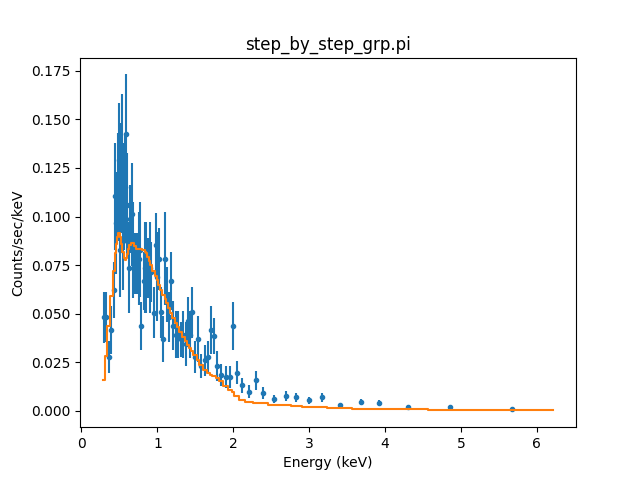

In [28]:
cat << EOM > s1.py
from sherpa.astro.ui import *
load_data("step_by_step_grp.pi")
notice(0.3,6)
subtract()  
set_source(xsphabs.a1*xspowerlaw.p1)
fit()
plot_fit()

import matplotlib.pylab as plt
plt.savefig("sherpa_01.png")
EOM

python s1.py
display < sherpa_01.png

# Cleanup


In [29]:
/bin/rm -rf 13858
/bin/rm -f acisf* pcadf*
